In [1]:
source('floroq_aaa_interaction.R')

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.8
v tidyr   0.8.2     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_integer(),
  match = col_logical(),
  searchTerm = col_character(),
  drugName = col_character(),
  geneID = col_integer(),
  geneName = col_character(),
  longGeneName = col_character(),
  interaction = col_character()
)
Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_integer(),
  match = col_character(),
  searchTerm = col_character(),
  drugName = col_character(),
  geneID = col_integer(),
  geneName = col_character(),
  longGeneName = co

In [23]:
head(df)
dim(df)

geneName,3A003_TH_adv,3A003_TH_med,3A004_TH_adv,3A004_TH_med,3A005_TH_adv,3A005_TH_med,3A012_TH_adv,3A012_TH_med,3A013_TH_adv,...,DAA17_TH_adv,DAA17_TH_med,DAA20_TH_adv,DAA20_TH_med,DAA24_TH_adv,DAA24_TH_med,DAA26_TH_adv,DAA26_TH_med,DAA27_TH_adv,DAA27_TH_med
01-dec,4.286488,4.249061,4.106726,4.335066,4.365617,3.986007,4.338170,4.282027,4.079397,...,4.283215,4.217659,4.176424,4.324764,4.609260,4.087932,4.242698,4.113125,4.726386,4.258100
01-sep,8.708398,6.727924,6.701858,5.945025,6.357557,5.453104,7.513946,6.081017,7.790916,...,6.416656,5.747074,5.818053,5.845204,6.271581,6.166153,5.854347,5.413225,6.199409,5.643031
02-mar,5.854109,5.715472,5.339148,5.195328,5.003468,5.264660,5.663589,5.507421,5.329818,...,6.046608,5.859059,6.743392,5.799159,5.987110,5.815696,6.594346,6.416267,5.466720,6.058782
02-sep,10.095170,10.584870,9.916068,10.076650,10.079570,10.647320,10.050850,10.349500,9.986881,...,10.413260,10.226070,9.838826,10.185080,9.372027,9.915050,9.696939,10.095460,9.661633,10.047270
03-sep,5.357802,5.399105,5.363427,5.475368,5.201574,5.778318,5.257439,5.613032,5.322385,...,5.285743,5.249061,5.503129,5.088105,5.412775,5.221214,5.221575,4.899024,5.409626,5.025784
04-sep,6.637689,7.961073,7.113302,6.762778,7.804593,7.864443,7.214982,6.544622,6.934178,...,7.000036,7.467829,6.602685,7.596896,6.436317,7.431512,6.172637,6.728692,6.304392,6.365488


[1] 25877    43

In [10]:
head(df_long)

geneName,variable,value,status,id,tissue
01-dec,3A003_TH_adv,4.286488,3,3A003,adv
01-sep,3A003_TH_adv,8.708398,3,3A003,adv
02-mar,3A003_TH_adv,5.854109,3,3A003,adv
02-sep,3A003_TH_adv,10.095170,3,3A003,adv
03-sep,3A003_TH_adv,5.357802,3,3A003,adv
04-sep,3A003_TH_adv,6.637689,3,3A003,adv


In [16]:
library(gplots);library(RColorBrewer)

In [70]:
df_long  %>% 
    group_by(geneName)  %>% 
    summarize(var = var(value))  %>% 
    arrange(desc(var))  %>% 
    head(100)  ->
    top100_var_genes

In [71]:
df  %>% 
    select(geneName, matches('_adv'))  %>% 
    filter(geneName %in% top100_var_genes$geneName) ->
    heat
    

In [72]:
clabs <- str_sub(colnames(heat)[2:22], 1,2) 
colss <- ifelse(clabs =='3A','blue', 'red')
#colss[clabs == '3A'] <- 'red'

In [73]:
clabs
colss

[1] "3A" "3A" "3A" "3A" "3A" "3A" "3A" "3A" "3A" "3A" "DA" "DA" "DA" "DA" "DA"
[16] "DA" "DA" "DA" "DA" "DA" "DA"

[1] "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue" "blue"
[11] "red"  "red"  "red"  "red"  "red"  "red"  "red"  "red"  "red"  "red" 
[21] "red"

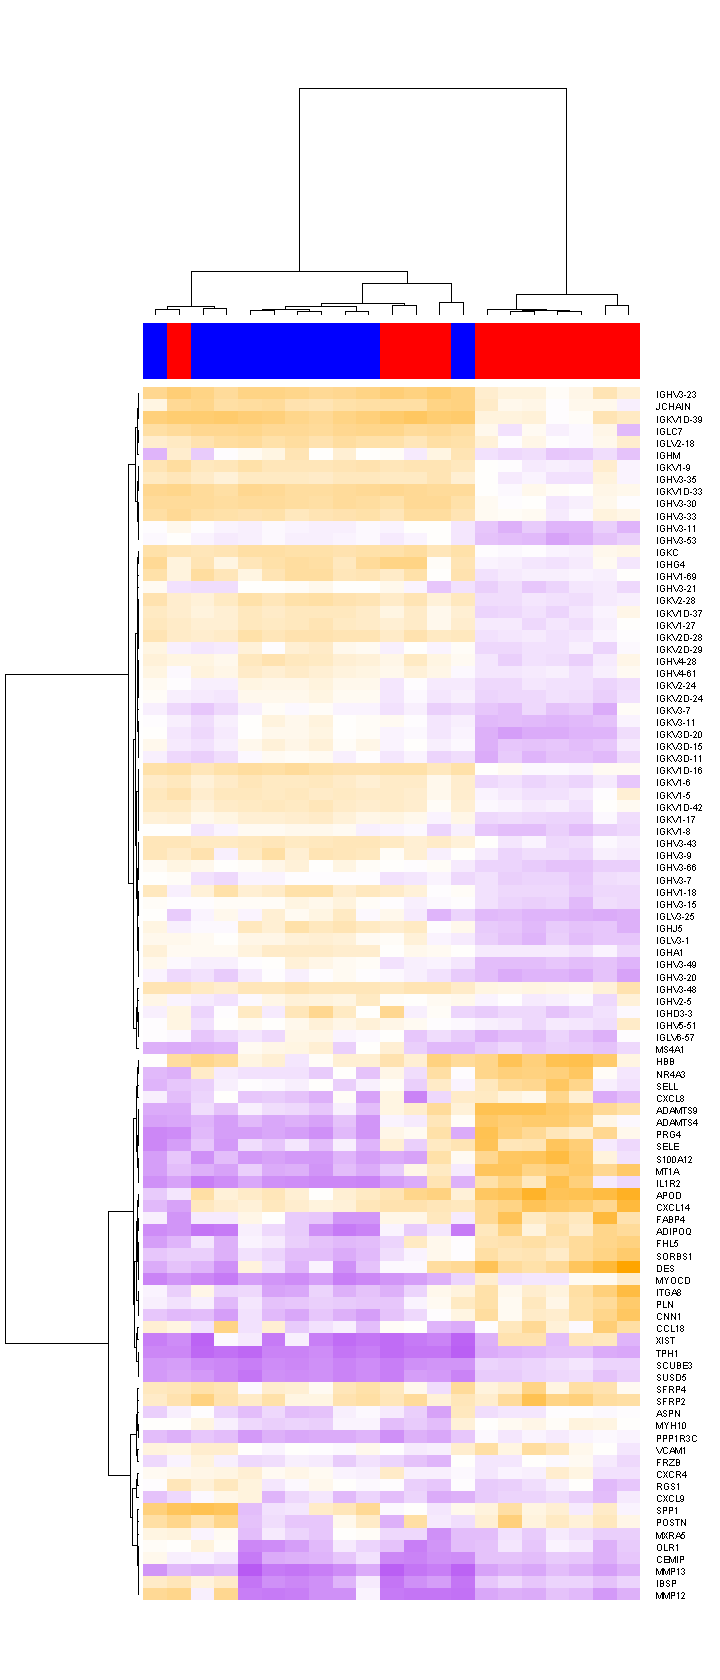

In [74]:
options(repr.plot.width=6, repr.plot.height=14)


X <- as.matrix(heat[,2:22])
clabs <- clabs
colss <- colss
rlabs <- heat$geneName

#heatmap(X, col=heat.colors(nrow(X)), main= "", labCol = clabs, cexCol = 1, labRow = rlabs)

scx<-scale(X, center = T, scale = T)

palette<-colorRampPalette(c("purple", "white", "orange"))(n=nrow(scx))
heatmap.2(scx, trace = "none", labCol = "", cexCol = 1, labRow=rlabs,col = palette, keysize = 1, main = "",
          ColSideColors=colss, key=F, hclustfun = function(x){hclust(x,method = "ward.D")},distfun = function(x) 
          {as.dist(1 - cor(t(x), method="spearman"))})






In [42]:
dim(heat)

[1] 100  22

In [52]:
length(colss)

[1] 42

In [69]:
dim(features)

[1] 33494     2

In [78]:
unique(beta_lactams$drugName)

[1] "AMOXICILLIN"                  "AMPICILLIN"                  
 [3] "PENICILLIN G POTASSIUM"       "BENZYLPENICILLOYL POLYLYSINE"
 [5] "CEFACLOR"                     "CEFADROXIL"                  
 [7] "CEPHAPIRIN"                   "CEFAZOLIN"                   
 [9] "CEFDINIR"                     "CEFEPIME"                    
[11] "CEFIXIME"                     "CEFORANIDE"                  
[13] "CEFOTAXIME"                   "CEFPIRAMIDE"                 
[15] "CEPHRADINE"                   "CEFTAZIDIME"                 
[17] "CEFUROXIME"                   "CEPHALEXIN HYDRATE"          
[19] "CLAVULANIC ACID"              "DICLOXACILLIN"               
[21] "FLOXACILLIN"                  "MOXALACTAM"                  
[23] "MEROPENEM"                    "METHICILLIN"                 
[25] "NAFCILLIN"                    "OXACILLIN"                   
[27] "TICARCILLIN"

In [79]:
unique(drug_interactions$drugName)

[1] "FLEROXACIN"     "OFLOXACIN"      "LOMEFLOXACIN"   "GATIFLOXACIN"  
 [5] "NALIDIXIC ACID" "ROSOXACIN"      "CIPROFLOXACIN"  "ENOXACIN"      
 [9] "TROVAFLOXACIN"  "LEVOFLOXACIN"   "GEMIFLOXACIN"   "MOXIFLOXACIN"  
[13] "PEFLOXACIN"     "NORFLOXACIN"    "SPARFLOXACIN"   "CINOXACIN"     
[17] "GREPAFLOXACIN"